In [1]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set()

# Get data from John Hopkins CSSE Git Repository
# Rerun this daily to get updated statistics

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url, error_bad_lines=False)
# url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
# recover = pd.read_csv(url, error_bad_lines=False)

# Frequently updated local data source 
# url = 'https://raw.githubusercontent.com/digitalhumanitarians/COVID-19LK/master/time_series-covid-19-Confirmed.csv'
# lk_confirmed = pd.read_csv(url, error_bad_lines=False)

In [2]:
# check for last availble date => Maryland is 9:30 hrs behind local time
last_date=confirmed.columns[confirmed.columns.size-1]
print(last_date)

4/26/20


In [3]:
# sum over countries
confirmedcountry=confirmed.groupby("Country/Region", as_index=False).sum() 

In [4]:
# order by cases
# get top 10 countries => using first column as index
ccs=confirmedcountry.sort_values(by=last_date, ascending=False).head(10)
print('Confirmed Cases') 

print(ccs[['Country/Region',last_date]].to_string(index=False))

Confirmed Cases
 Country/Region  4/26/20
             US   965785
          Spain   226629
          Italy   197675
         France   162220
        Germany   157770
 United Kingdom   154037
         Turkey   110130
           Iran    90481
          China    83912
         Russia    80949


In [5]:
ccs.head(10)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
171,US,37.0902,-95.7129,1,1,2,2,5,5,5,...,699706,732197,758809,784326,811865,840351,869170,905358,938154,965785
156,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,190839,191726,198674,200210,204178,208389,213024,219764,223759,226629
84,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,172434,175925,178972,181228,183957,187327,189973,192994,195351,197675
61,France,91.3624,59.7192,0,0,2,3,3,3,4,...,148084,148086,153011,155393,158168,155980,158303,159952,161644,162220
65,Germany,51.0000,9.0000,0,0,0,0,0,1,4,...,141397,143342,145184,147065,148291,150648,153129,154999,156513,157770
175,United Kingdom,270.0299,-482.9247,0,0,0,0,0,0,0,...,109769,115314,121172,125856,130172,134638,139246,144640,149569,154037
170,Turkey,38.9637,35.2433,0,0,0,0,0,0,0,...,78546,82329,86306,90980,95591,98674,101790,104912,107773,110130
80,Iran,32.0000,53.0000,0,0,0,0,0,0,0,...,79494,80868,82211,83505,84802,85996,87026,88194,89328,90481
36,China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,...,83760,83787,83805,83817,83853,83868,83884,83899,83909,83912
138,Russia,60.0000,90.0000,0,0,0,0,0,0,0,...,32008,36793,42853,47121,52763,57999,62773,68622,74588,80949


In [6]:
# sum of the deaths over countries
deathcountry=death.groupby("Country/Region", as_index=False).sum()

In [7]:
# # sum of the recoveries over countries
# recovercountry=recover.groupby("Country/Region", as_index=False).sum()

In [8]:
# order by cases 
# get top 10 countries => using first column as index
dcs=deathcountry.sort_values(by=last_date, ascending=False).head(10)
print('Deaths')

print(dcs[['Country/Region',last_date]].to_string(index=False)) 

Deaths
 Country/Region  4/26/20
             US    54881
          Italy    26644
          Spain    23190
         France    22890
 United Kingdom    20794
        Belgium     7094
        Germany     5976
           Iran     5710
          China     4637
    Netherlands     4491


In [9]:
# order by recoveries 
# get top 10 countries => using first column as index
# rcs=recovercountry.sort_values(by=last_date, ascending=False).head(10)
# print("Recoveries")

# print(rcs[["Country/Region", last_date]].to_string(index=False))

In [10]:
# top 10 countries by cases
countries=ccs['Country/Region'].values
print(countries)

['US' 'Spain' 'Italy' 'France' 'Germany' 'United Kingdom' 'Turkey' 'Iran'
 'China' 'Russia']


In [11]:
# top 10 countries by deaths
dcountries=dcs['Country/Region'].values
print(dcountries)

['US' 'Italy' 'Spain' 'France' 'United Kingdom' 'Belgium' 'Germany' 'Iran'
 'China' 'Netherlands']


In [12]:
# top 10 countries by recoveries
# rcountries=rcs["Country/Region"].values
# print(rcountries)

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


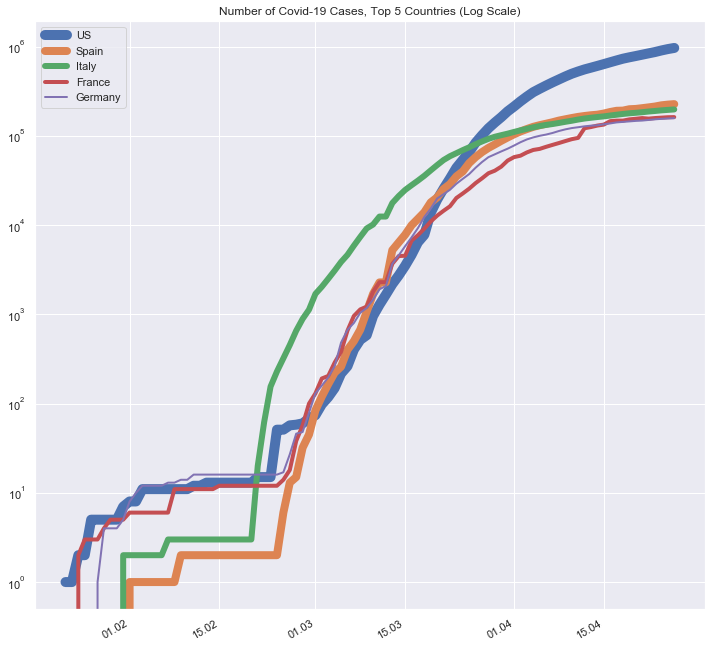

In [13]:
# top 5 countries by number of confirmed cases => Log scale
zerodate = datetime.datetime(2020, 1, 22) # => change this if when running local data
d = confirmed.columns.size-4
date0 = [zerodate + datetime.timedelta(days=i) for i in range(d)]

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in countries[0:5]:
    scdata=ccs.loc[ccs['Country/Region']==country].values[:,3:][0]
    ax.set_yscale('log')
    ax.plot(date0,scdata, label='%s' % country, linewidth=12-2*i)
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Cases, Top 5 Countries (Log Scale)')
    i=i+1
plt.show()

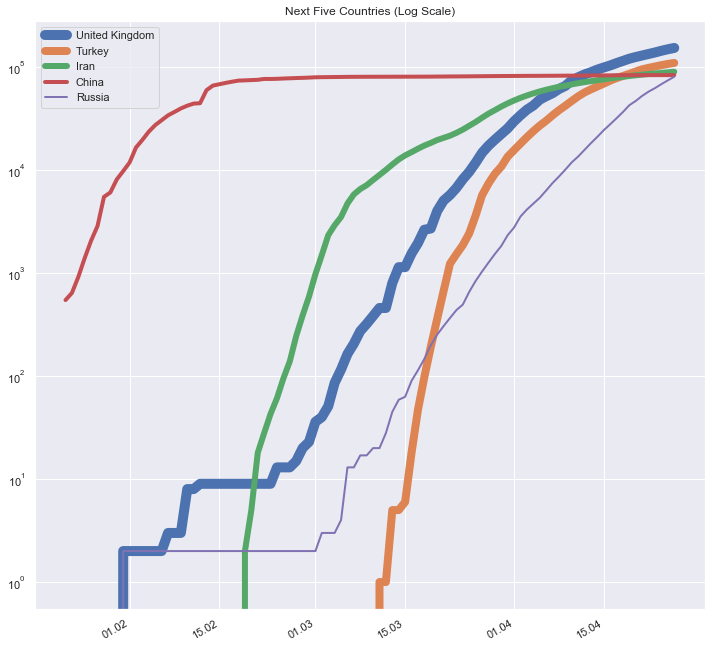

In [14]:
# next 5 countries by number of confirmed cases (5-10) => Log scale

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in countries[5:10]:
    scdata=ccs.loc[ccs['Country/Region']==country].values[:,3:][0]
    ax.set_yscale('log')
    ax.plot(date0,scdata, label='%s' % country, linewidth=12-2*i)
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Next Five Countries (Log Scale)')
    i=i+1
plt.show()

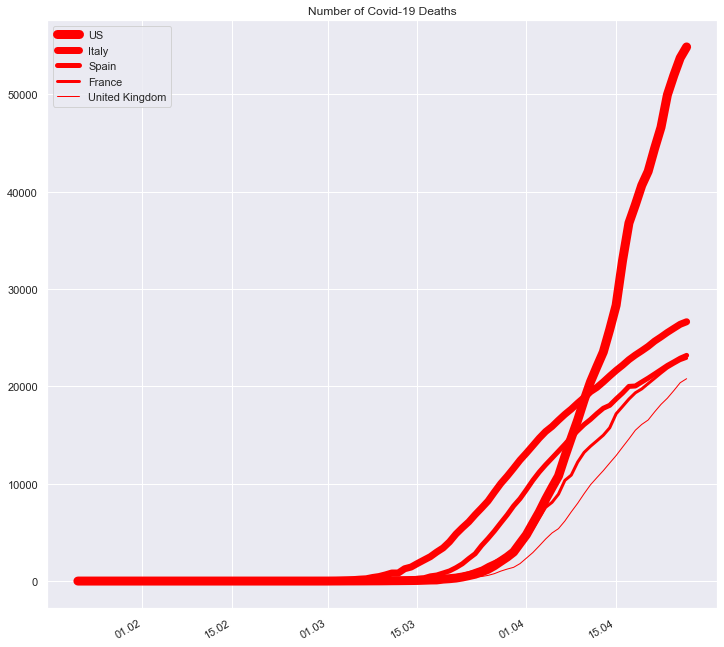

In [15]:
# top 5 countries by number of deaths => Log scale

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in dcountries[0:5]:
    scdata=dcs.loc[dcs['Country/Region']==country].values[:,3:][0]
    ax.plot(date0,scdata, label='%s' % country, linewidth=11-2*i, color='red')
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Deaths')
    i=i+1
plt.show()

In [16]:
# top 5 countries by number of recoveries => Log scale

# fig, ax = plt.subplots(figsize=(12, 12)) 
# i=1
# for country in rcountries[0:5]:
#     scdata=rcs.loc[rcs['Country/Region']==country].values[:,3:][0]
#     ax.plot(date0,scdata, label='%s' % country, linewidth=11-2*i, color='green')
#     myFmt = DateFormatter("%d.%m")
#     ax.xaxis.set_major_formatter(myFmt)
#     fig.autofmt_xdate()
#     ax.legend(loc='upper left')
#     ax.set_title('Number of Covid-19 Recoveries')
#     i=i+1
# plt.show()

In [17]:
# cases in Sri Lanka
sldata=confirmed.loc[confirmed['Country/Region']=='Sri Lanka'].values[:,4:][0]
print(sldata)

# updated cases from local source
# sldata = lk_confirmed.loc[lk_confirmed['Location']=='IDH'].values[:,1:][0]
# print(sldata)

[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 6 10 18 28 44 51 60 73 77 82 97 102 102 106
 106 113 117 122 143 146 151 159 166 176 178 185 189 190 190 198 210 217
 233 238 238 244 254 271 304 310 330 368 420 460 523]


In [18]:
# regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

LR = LinearRegression()
d = np.arange(sldata.size).reshape(-1,1)

# degree => 7 
quad = PolynomialFeatures(degree=7)
X_quad = quad.fit_transform(d)

LR.fit(X_quad, sldata)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# next 14 days forecast
from sklearn.metrics import r2_score

d_fit = np.arange(0, sldata.size+14)[:, np.newaxis]
y_poly_fit = LR.predict(quad.fit_transform(d_fit))
quad_r2 = r2_score(sldata, LR.predict(X_quad))

# coefficiants of the regression polynomial
print(LR.coef_)

# R^2 score
print("\nR^2 =", quad_r2)

[ 0.00000000e+00  1.88361384e+00 -4.31672200e-01  3.85065121e-02
 -1.58578076e-03  3.19539210e-05 -3.03114801e-07  1.08756137e-09]

R^2 = 0.9975918227957529


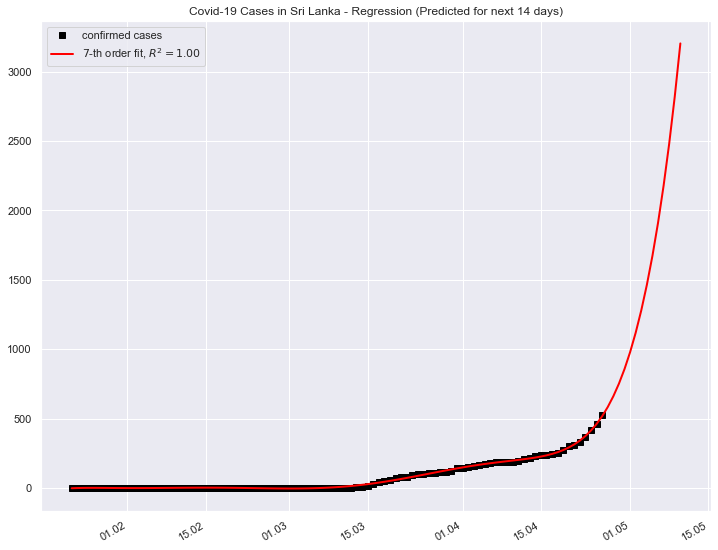

In [20]:
# plot regression for next 14 days

date = [zerodate + datetime.timedelta(days=i) for i in range(len(d_fit))]
fig, ax = plt.subplots(figsize=(12, 10)) 
ax.plot(date0,sldata,'s',color='black',label='confirmed cases')
ax.plot(date, y_poly_fit,label='$7$-th order fit, $R^2=%.2f$' % quad_r2, linestyle='-', color='red', linewidth=2)
ax.legend(loc='upper left')
ax.set_title('Covid-19 Cases in Sri Lanka - Regression (Predicted for next 14 days)')
myFmt = DateFormatter("%d.%m")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()
plt.show()